In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Logistic Regression

### Prepare the data for Logistic Regression

In [2]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.shape

(344, 7)

In [4]:
data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Chinstrap']
data.shape

(266, 3)

In [5]:
X = data.drop(['species'], axis=1)
X = X.values

ss = StandardScaler()
X = ss.fit_transform(X)

In [6]:
y = data['species']
spicies = {'Adelie': 0, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

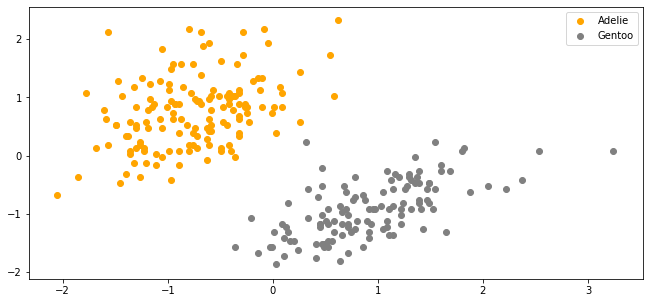

In [8]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
plt.legend();

### Python Implementation

In [9]:
class MyLogisticRegression():
    '''Implements algorithm for Logistic Regression'''
    def __init__(self, learning_rate=0.1):
        self.learning_rate=learning_rate
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __loss(self, p, y):
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).mean()
    
    def __extend_input(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __gradient(self, X, p, y):
        return np.dot(X.T, (p - y)) / y.size
    
    def fit(self, X, y, epochs):
        X = self.__extend_input(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(epochs):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            loss = self.__loss(h, y)

            if(i % 10000 == 0):
                print(f'Epoch {i} - Loss: {loss} \t') 
                
            self.theta -= self.learning_rate * self.__gradient(X, h, y)

    def predict(self, X):
        X = self.__extend_input(X)
        probability = self.__sigmoid(np.dot(X, self.theta))
        
        return probability.round()

In [10]:
model = MyLogisticRegression()
model.fit(X_train, y_train, 200000)

Epoch 0 - Loss: 0.6931471805599453 	
Epoch 10000 - Loss: 0.006929301088831036 	
Epoch 20000 - Loss: 0.0052213640070346255 	
Epoch 30000 - Loss: 0.004403572119669867 	
Epoch 40000 - Loss: 0.0038766987645504395 	
Epoch 50000 - Loss: 0.0034915690990946014 	
Epoch 60000 - Loss: 0.003190222715849551 	
Epoch 70000 - Loss: 0.0029443965065307203 	
Epoch 80000 - Loss: 0.0027381877342804416 	
Epoch 90000 - Loss: 0.002561721561806985 	
Epoch 100000 - Loss: 0.0024084142417352527 	
Epoch 110000 - Loss: 0.0022736377539140065 	
Epoch 120000 - Loss: 0.0021540048651216646 	
Epoch 130000 - Loss: 0.0020469571522881576 	
Epoch 140000 - Loss: 0.0019505130680442125 	
Epoch 150000 - Loss: 0.0018631061918403778 	
Epoch 160000 - Loss: 0.001783477116817778 	
Epoch 170000 - Loss: 0.0017105987183340208 	
Epoch 180000 - Loss: 0.0016436230157147558 	
Epoch 190000 - Loss: 0.0015818424698212127 	


In [11]:
preditions = model.predict(X_test)
print(accuracy_score(preditions, y_test))

1.0


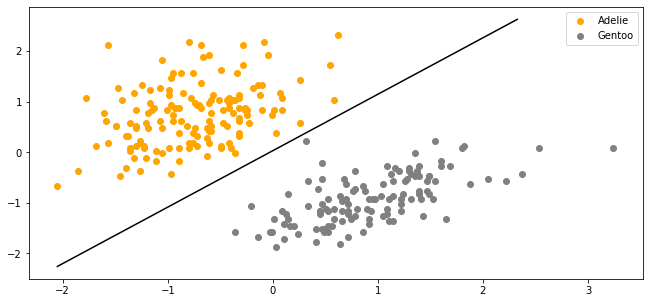

In [12]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
plt.legend()


x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
y_values = - (model.theta[0] + np.dot(model.theta[1], x_values)) / model.theta[2]

plt.plot(x_values, y_values, color='black');

### Using SciKit Learn

In [13]:
model = LogisticRegression(C=1e20)
model.fit(X_train, y_train)

preditions = model.predict(X_test)
print(accuracy_score(preditions, y_test))

1.0


## K-Nearest Neighbour

### Prepare the data for K-Nearest Neighbour

In [14]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [15]:
ss = StandardScaler()

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

# Prepare input
X = data.drop(['species'], axis=1)
X = X.values
X = ss.fit_transform(X)

# Prepare target
y = data['species']
spicies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
y = [spicies[item] for item in y]
y = np.array(y) 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

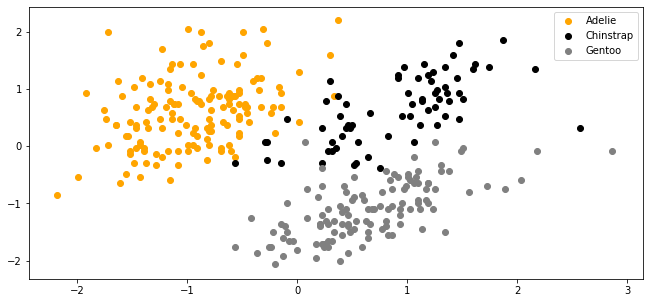

In [16]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='black', label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='gray', label='Gentoo')
plt.legend();

### Python Implementation

In [17]:
class MyKNearestNeighbors():
    '''Implements algorithm for K-Nearest Neighbors'''
    def __init__(self, num_neighbors=5, num_clasess=3):
        self.num_neighbors = num_neighbors
        self.num_clasess = num_clasess

    def __euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def __get_neighbours(self, X_test, return_distance=False):
        neighbours = []

        test_train_distances = [self.__euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in test_train_distances:
            enumerated_neighbours = enumerate(row)
            sorted_neighbours = sorted(enumerated_neighbours, key=lambda x: x[1])[:self.num_neighbors]

            index_list = [tup[0] for tup in sorted_neighbours]

            neighbours.append(index_list)
      
        return np.array(neighbours)
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = self.__get_neighbours(X_test)
        preditions = np.array([
            np.argmax(np.bincount(self.y_train[neighbor]))
            for neighbor in neighbors
        ])

        return preditions

In [18]:
model = MyKNearestNeighbors()
model.fit(X_train, y_train)

In [19]:
preditions = model.predict(X_test)
print(accuracy_score(preditions, y_test))

1.0


In [20]:
pd.DataFrame({
    'Actual Value': y_test,
    'KNN Predictions': preditions,
})

,Actual Value,KNN Predictions
0,1,1
1,2,2
2,0,0
3,2,2
4,0,0
...,...,...
62,2,2
63,2,2
64,2,2
65,0,0


### Using SkLearn

In [21]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

sk_knn_preditions = model.predict(X_test)

pd.DataFrame({
    'Actual Value': y_test,
    'KNN Predictions': preditions,
    'SciKit Learn KNN': sk_knn_preditions,
})

1.0


,Actual Value,KNN Predictions,SciKit Learn KNN
0,1,1,1
1,2,2,2
2,0,0,0
3,2,2,2
4,0,0,0
...,...,...,...
62,2,2,2
63,2,2,2
64,2,2,2
65,0,0,0


## Naive Bias

### Prepare the data for Naive Bias

In [22]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [23]:
data = pd.read_csv('./data/penguins_size.csv')
ss = StandardScaler()

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

# Prepare input
X = data.drop(['species'], axis=1)
columns = X.columns
X = X.values
X = ss.fit_transform(X)

# Prepare target
y = data['species']
spicies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
y = [spicies[item] for item in y]
y = np.array(y) 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Python Implementation

In [24]:
class MyNaiveBias():
    '''Implements algorithm for Naive Bias'''
    def __init__(self, input_columns):
        self.input_columns = input_columns
        
    def fit(self, X_train, y_train):
        X_train = pd.DataFrame(X_train, columns = self.input_columns)
        
        self.classes = np.unique(y_train)
        self.means = X_train.groupby(y_train).apply(np.mean)
        self.stds = X_train.groupby(y_train).apply(np.std)
        self.probabilities = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

    def predict(self, X_test):
        X_test = pd.DataFrame(X_test, columns = self.input_columns)
        predictions = []
        
        for i in range(X_test.shape[0]):
            p = {}
            
            for c in self.classes:
                p[c] = self.probabilities[c]
                
                for index, row in enumerate(X_test.iloc[i]):
                    p[c] *= norm.pdf(row, self.means.iloc[c, index], self.stds.iloc[c, index])
        
            predictions.append(pd.Series(p).values.argmax())

        return predictions

In [25]:
model = MyNaiveBias(columns)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(preditions, y_test))

1.0


In [26]:
pd.DataFrame({
    'Actual Value': y_test,
    'Naive Bias Predictions': preditions,
})

,Actual Value,Naive Bias Predictions
0,1,1
1,2,2
2,0,0
3,2,2
4,0,0
...,...,...
62,2,2
63,2,2
64,2,2
65,0,0


### Using SkLearn

In [27]:
model = GaussianNB()
model.fit(X_train, y_train)
sk_nb_preditions = model.predict(X_test)

print(accuracy_score(sk_nb_preditions, y_test))

pd.DataFrame({
    'Actual Value': y_test,
    'Naive Bias Predictions': preditions,
    'SciKit Learn NB': sk_nb_preditions,
})

0.9402985074626866


,Actual Value,Naive Bias Predictions,SciKit Learn NB
0,1,1,1
1,2,2,2
2,0,0,0
3,2,2,1
4,0,0,0
...,...,...,...
62,2,2,2
63,2,2,2
64,2,2,2
65,0,0,0
